# Machine Learning Fundamentals and Pipelines
## Author: Lei Cao

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

from numpy import arange
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Q1: Intro
#### 1. Read in the data
#### 2. Set the random seed to '123': Do this all of over your script to ensure reproducibility
#### 3. Shuffle the rows in your dataset
#### 4. Recode the target variable (overwrite the column) to be binary (If greater than median, give it a '1', otherwise give it a '0')

In [3]:
# Read in the dataset
df = pd.read_csv('/content/drive/My Drive/5512 Spring 2020/Assignments/Assignment 2/500Cities_cleandata_ReadyForEDA(1).csv')
print(df.shape)
df.head()

(500, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [4]:
# Drop any rows with NA
df = df.dropna()
print(df.shape)
df.head()

(453, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [5]:
# Recode the target variable
df['Flag_Population'] = (df['Population2010'] > np.median(df['Population2010'])) * 1
print(df.shape)
print(df.groupby('Flag_Population').size())

(453, 35)
Flag_Population
0    227
1    226
dtype: int64


In [0]:
# Prepare data
array = df.values
X = array[:, 5:33]
Y = array[:, 34]

In [7]:
X

array([[7.5, 16.9, 21.8, ..., 33.9, 1.9, 6.8],
       [19.6, 30.6, 16.9, ..., 37.7, 4.5, 18.3],
       [7.7, 15.1, 19.6, ..., 32.2, 1.9, 6.7],
       ...,
       [11.1, 22.2, 19.0, ..., 39.1, 3.0, 18.0],
       [36.8, 19.3, 14.6, ..., 32.5, 3.2, 14.3],
       [20.1, 16.8, 18.0, ..., 39.1, 2.5, 16.2]], dtype=object)

In [0]:
X = X.astype(float)
Y = Y.astype(int)

In [0]:
# Split-out validation dataset
validation_size = 0.20
seed = 123
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

### Q2: Spot-checking and k-fold cross-validation
#### 1. Use the 'SpotCheck for Classification Models' codes we covered in class as a guide
#### 2. Update the models to use all of these (come up with your own names):
##### 1) GradientBoostingClassifier()
##### 2) DecisionTreeClassifier()
##### 3) RandomForestClassifier()
##### 4) LinearDiscriminantAnalysis()
##### 5) LogisticRegression()
##### 6) KNeighborsClassifier()
##### 7) GaussianNB()
##### 8) ExtraTreesClassifier()
##### 9) BaggingClassifier()
#### 3. Use a 20-fold cross-validation on the data, which model performs the best?
#### 4. For the algorithm that performs the best, run the model on all training data and predict the holdout data. Call this Model1 (Use this as a guide)
#### 5. Now, try some hyperparameter tuning on that algorithm. Use this as a guide: https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-2.html (You will need to update this code to account for the tunable hyperparameters. Read the documentation if you have questions on the possible hyperparameters.)

In [0]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 20
seed = 123
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ET', ExtraTreesClassifier(random_state=seed)))
models.append(('BC', BaggingClassifier(random_state=seed)))

In [11]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GB: 0.591813 (0.136998)
CART: 0.572661 (0.126690)
RF: 0.601901 (0.131655)
LDA: 0.572368 (0.092556)
LR: 0.564181 (0.099808)
KNN: 0.535819 (0.121036)
NB: 0.580409 (0.123323)
ET: 0.544006 (0.088271)
BC: 0.535819 (0.116878)


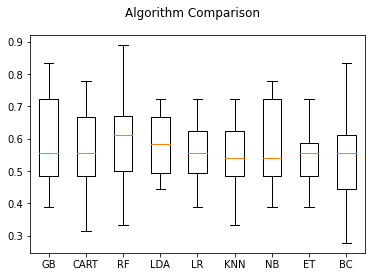

In [12]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# According to the results above and the following boxplots, the LinearDiscriminantAnalysis model performs the best.

In [13]:
# Make predictions on validation dataset
Model1 = LinearDiscriminantAnalysis()
Model1.fit(X_train, Y_train)
predictions = Model1.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4945054945054945
[[18 26]
 [20 27]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44        44
           1       0.51      0.57      0.54        47

    accuracy                           0.49        91
   macro avg       0.49      0.49      0.49        91
weighted avg       0.49      0.49      0.49        91



In [0]:
# Since the best model I choose is linear discriminant analysis, it has no hyperparameters to tune.

### Q3: Pipelines
#### 1. In a new notebook, use the same data pre-processing and prep the data (from Q1)
#### 2. But now, instead of SpotCheck, use the Pipeline example from the KDNuggets Blog Part 3 as your guide: https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html
#### 3. From the nine possible models listed in Q2, pick the three that worked the best, and let's explore them in more detail
##### 1) Use standard scaling and PCA as pre-processing
##### 2) Do hyperparameter tuning like they do in the blog
#### 4. Use the best fitting model and architecture to predict the holdout data (re-train on all training data, then apply to holdout model)
##### 1) Run accuracy metrics - did your results improve over the previous section? Explain why you think this happened

In [15]:
# Read in the dataset
df = pd.read_csv('/content/drive/My Drive/5512 Spring 2020/Assignments/Assignment 2/500Cities_cleandata_ReadyForEDA(1).csv')
print(df.shape)
df.head()

(500, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [16]:
# Drop any rows with NA
df = df.dropna()
print(df.shape)
df.head()

(453, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [17]:
# Recode the target variable
df['Flag_Population'] = (df['Population2010'] > np.median(df['Population2010'])) * 1
print(df.shape)
print(df.groupby('Flag_Population').size())

(453, 35)
Flag_Population
0    227
1    226
dtype: int64


In [0]:
# Prepare data
array = df.values
X = array[:, 5:33]
Y = array[:, 34]

In [0]:
X = X.astype(float)
Y = Y.astype(int)

In [0]:
# Split-out validation dataset
validation_size = 0.20
seed = 123
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [0]:
# Based on the results of the nine models from Q2, the LinearDiscriminantAnalysis, LogisticRegression, and ExtraTreesClassifier are three models that work the best.

from sklearn.pipeline import Pipeline

# Construct pipelines using standard scaling and PCA
## LinearDiscriminantAnalysis()
pipe_lda = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
										 ('clf', LinearDiscriminantAnalysis())])

## LogisticRegression()
pipe_lr = Pipeline([('scl', StandardScaler()),
			              ('pca', PCA(n_components=2)),
		             	  ('clf', LogisticRegression(max_iter=1000000))])

## ExtraTreesClassifier()
pipe_et = Pipeline([('scl', StandardScaler()),
			              ('pca', PCA(n_components=2)),
			              ('clf', ExtraTreesClassifier(random_state=seed))])

In [0]:
# Construct some pipelines with GaussianNB, ExtraTreesClassifier,RandomForestClassifier
pipe_GNB = Pipeline([('scl', StandardScaler()),
			('clf', GaussianNB())])

pipe_GNB_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', GaussianNB())])

pipe_RFC = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_RFC_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_ET = Pipeline([('scl', StandardScaler()),
			('clf', ExtraTreesClassifier(random_state=seed))])

pipe_ET_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', ExtraTreesClassifier(random_state=seed))])
			

### From the nine possible models listed in Q2, pick the three that worked the best, and let’s explore them in more detail.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# Construct some pipelines with GaussianNB, ExtraTreesClassifier,RandomForestClassifier
pipe_GNB = Pipeline([('scl', StandardScaler()),
			('clf', GaussianNB())])

pipe_GNB_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', GaussianNB())])

pipe_RFC = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_RFC_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', RandomForestClassifier(random_state=seed))])

pipe_ET = Pipeline([('scl', StandardScaler()),
			('clf', ExtraTreesClassifier(random_state=seed))])

pipe_ET_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(0.95)),
			('clf', ExtraTreesClassifier(random_state=seed))])
			

In [0]:
# Set grid search params
param_range = [1, 5, 10]

grid_params_GNB = [{'clf__var_smoothing': [10, 1, 0, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]}] 

grid_params_RFC = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': [10, 15, 20],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

grid_params_ET = [{'clf__max_depth': [10, 15, 20],
		'clf__min_samples_leaf': param_range,
		'clf__n_estimators': [10,20,30],
		'clf__min_samples_split': param_range[1:],
		'clf__bootstrap': [True, False]}]

In [0]:
# Construct grid searches
jobs = -1

gs_GNB = GridSearchCV(estimator=pipe_GNB,
			param_grid=grid_params_GNB,
			scoring='accuracy',
			cv=10) 
			
gs_GNB_pca = GridSearchCV(estimator=pipe_GNB_pca,
			param_grid=grid_params_GNB,
			scoring='accuracy',
			cv=10)
			
gs_RFC = GridSearchCV(estimator=pipe_RFC,
			param_grid=grid_params_RFC,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_RFC_pca = GridSearchCV(estimator=pipe_RFC_pca,
			param_grid=grid_params_RFC,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_ET = GridSearchCV(estimator=pipe_ET,
			param_grid=grid_params_ET,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_ET_pca = GridSearchCV(estimator=pipe_ET_pca,
			param_grid=grid_params_ET,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)


In [0]:
# List of pipelines for ease of iteration
grids = [gs_GNB, gs_GNB_pca, gs_RFC, gs_RFC_pca, gs_ET, gs_ET_pca]

In [0]:
# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0: 'GaussianNB', 1: 'GaussianNB w/PCA', 
		2: 'RandomForestClassifier', 3: 'RandomForestClassifier w/PCA', 
		4: 'ExtraTreesClassifier', 5: 'ExtraTreesClassifier w/PCA'}

In [29]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, Y_train.ravel())
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_validation)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_validation, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(Y_validation, y_pred) > best_acc:
		best_acc = accuracy_score(Y_validation, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: GaussianNB
Best params: {'clf__var_smoothing': 0}
Best training accuracy: 0.569
Test set accuracy score for best params: 0.615 

Estimator: GaussianNB w/PCA
Best params: {'clf__var_smoothing': 0}
Best training accuracy: 0.567
Test set accuracy score for best params: 0.560 

Estimator: RandomForestClassifier
Best params: {'clf__bootstrap': False, 'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 5}
Best training accuracy: 0.597
Test set accuracy score for best params: 0.571 

Estimator: RandomForestClassifier w/PCA
Best params: {'clf__bootstrap': False, 'clf__criterion': 'gini', 'clf__max_depth': 15, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Best training accuracy: 0.550
Test set accuracy score for best params: 0.473 

Estimator: ExtraTreesClassifier
Best params: {'clf__bootstrap': True, 'clf__max_depth': 10, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 5, 'clf__n_

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GB: 0.591813 (0.136998)
CART: 0.572661 (0.126690)
RF: 0.601901 (0.131655)
LDA: 0.572368 (0.092556)
LR: 0.564181 (0.099808)
KNN: 0.535819 (0.121036)
NB: 0.580409 (0.123323)
ET: 0.544006 (0.088271)
BC: 0.535819 (0.116878)


In [0]:
# Set grid search parameters
# Because Linear Discriminant Analysis has no hyperparameters to tune, from now steps are done to solely the Logistic Regression and Extra Trees Classifier models.
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
									 'clf__solver': ['liblinear']}]

grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
									 'clf__max_depth': param_range,
									 'clf__min_samples_split': param_range[1:]}]

In [0]:
# Construct grid searches
jobs = -1

## LogisticRegression()
gs_lr = GridSearchCV(estimator = pipe_lr,
                     param_grid = grid_params_lr,
										 scoring = 'accuracy',
										 cv=10)

## ExtraTreesClassifier()
gs_et = GridSearchCV(estimator = pipe_et,
                     param_grid = grid_params_et,
										 scoring = 'accuracy',
										 cv = 10,
										 n_jobs = jobs)

In [0]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_et]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Extra Trees Classifier'}

In [34]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, Y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	Y_pred = gs.predict(X_validation)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_validation, Y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(Y_validation, Y_pred) > best_acc:
		best_acc = accuracy_score(Y_validation, Y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.577
Test set accuracy score for best params: 0.538 

Estimator: Extra Trees Classifier
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
Best training accuracy: 0.608
Test set accuracy score for best params: 0.538 

Classifier with best test set accuracy: Logistic Regression


In [35]:
# By comparing the accuracy of the Logistic Regression model, which has best test set accuracy, and that of the Linear Discriminant Analysis, 
# the Logistic Regression model is the best fitting one.

# Make predictions on validation dataset
Model1 = LogisticRegression()
Model1.fit(X_train, Y_train)
predictions = Model1.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5714285714285714
[[20 24]
 [15 32]]
              precision    recall  f1-score   support

           0       0.57      0.45      0.51        44
           1       0.57      0.68      0.62        47

    accuracy                           0.57        91
   macro avg       0.57      0.57      0.56        91
weighted avg       0.57      0.57      0.57        91



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# As shown in the accuracy metrics below, my result improved over the previous section. Because when performing cross-validation, there will be a data leakage so GridsearchCV fails to find the best model but just focuses on the cross-validation score. Therefore, using pipeline can solve this problem through model tuning.